In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import sqlite3

#exploring
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#models and eval
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#metric
from sklearn.metrics import accuracy_score

#splitting
from sklearn.model_selection import train_test_split

from category_encoders import OneHotEncoder

In [ ]:
#create wrangle function
def wrangle(db_path):
  #create connection
  conn = sqlite3.connect(db_path)
  #query
  query = """
  select distinct(imap.building_id) as b_id,
  bs.*, dmg.damage_grade from id_map as imap
  join building_structure as bs on imap.building_id = bs.building_id
  join building_damage as dmg on imap.building_id = dmg.building_id
  where district_id = 4
  """

  #connecting and importing to df
  df = pd.read_sql(query,conn,index_col = "b_id")

  #taking leaky features
  leak_feat = [col for col in df.columns  if "post_eq" in col]



  #CREATE BINARY TARGET
  df["damage_grade"] = df["damage_grade"].str.split(" ",expand = True)[1].astype(int)
  df["severe_damage"] = (df["damage_grade"] > 3).astype(int)

  #appemding dmg_grade to leak feat
  leak_feat.append("damage_grade")

  #drop multi collinearity column
  leak_feat.append("count_floors_pre_eq")

  #dropping high card building iD
  leak_feat. append("building_id")

  #drop leaky colums
  df = df.drop(leak_feat,axis = 1)

  return df

In [ ]:
df = wrangle("../content/drive/MyDrive/nepal.sqlite")
df.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
b_id,,,,,,,,,,,,
164002,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164081,21,200,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164089,18,315,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164098,45,290,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164103,21,230,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0


In [ ]:
"""leak_feat = []

for col in df.columns:
  if "post_eq" in col:
    leak_feat.append(col)
leak_feat"""

'leak_feat = []\n\nfor col in df.columns:\n  if "post_eq" in col:\n    leak_feat.append(col)\nleak_feat'

In [ ]:
"""leak_feat = [col for col in df.columns  if "post_eq" in col]
leak_feat"""

'leak_feat = [col for col in df.columns  if "post_eq" in col]\nleak_feat'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70836 entries, 164002 to 234835
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age_building            70836 non-null  int64 
 1   plinth_area_sq_ft       70836 non-null  int64 
 2   height_ft_pre_eq        70836 non-null  int64 
 3   land_surface_condition  70836 non-null  object
 4   foundation_type         70836 non-null  object
 5   roof_type               70836 non-null  object
 6   ground_floor_type       70836 non-null  object
 7   other_floor_type        70836 non-null  object
 8   position                70836 non-null  object
 9   plan_configuration      70836 non-null  object
 10  superstructure          70836 non-null  object
 11  severe_damage           70836 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 7.0+ MB


In [ ]:
"""#creating the binary target:
df["damage_grade"].value_counts()"""

'#creating the binary target:\ndf["damage_grade"].value_counts()'

In [ ]:
#df["damage_grade"] = df["damage_grade"].str.split(" ",expand = True)[1].astype(int)

In [ ]:
df.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
b_id,,,,,,,,,,,,
164002,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164081,21,200,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164089,18,315,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164098,45,290,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164103,21,230,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0


In [ ]:
#df["severe_damage"]  = (df["damage_grade"] > 3).astype(int)

In [ ]:
df["severe_damage"].value_counts()

,count
severe_damage,
1,45519
0,25317


                   age_building  plinth_area_sq_ft  height_ft_pre_eq
age_building           1.000000          -0.016856          0.047652
plinth_area_sq_ft     -0.016856           1.000000          0.283496
height_ft_pre_eq       0.047652           0.283496          1.000000


<Axes: >

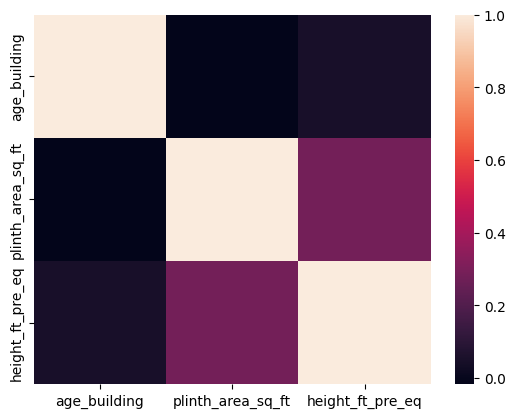

In [ ]:
##EXPLORE
corr = df.select_dtypes("number").drop("severe_damage", axis = 1).corr()
print(corr)
sns.heatmap(corr, cbar ="purple")

In [ ]:
"""  #Deciding which one to drop
  corr_1 = round(df["severe_damage"].corr(df["count_floors_pre_eq"]),4)
  corr_2 = round(df["severe_damage"].corr(df["height_ft_pre_eq"]),4)
  print("corr_1 = ", corr_1)
  print("corr_2 = ", corr_2)"""

'  #Deciding which one to drop\n  corr_1 = round(df["severe_damage"].corr(df["count_floors_pre_eq"]),4)\n  corr_2 = round(df["severe_damage"].corr(df["height_ft_pre_eq"]),4)\n  print("corr_1 = ", corr_1)\n  print("corr_2 = ", corr_2)'

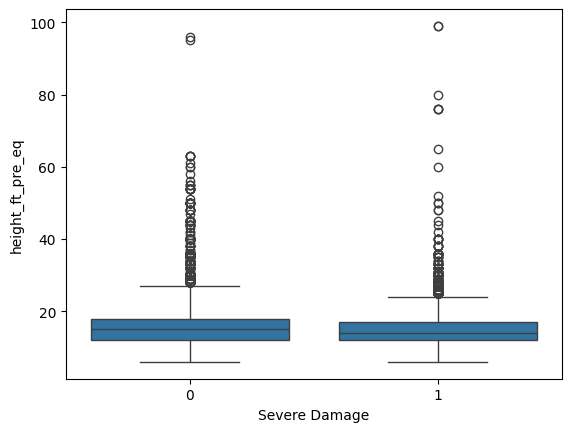

In [ ]:
sns.boxplot(
    x = "severe_damage",
    y = "height_ft_pre_eq",
    data = df
);
plt.xlabel("Severe Damage");

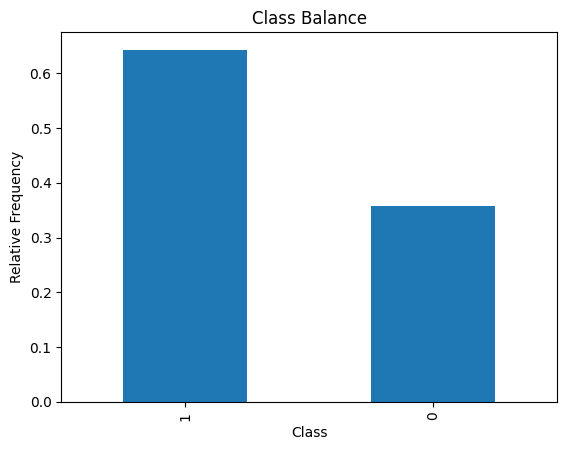

In [ ]:
#Plot value couts of severedamage
df["severe_damage"].value_counts(normalize = True).plot(
    kind = "bar",
    xlabel = "Class",
    ylabel = "Relative Frequency",
    title = "Class Balance");

In [ ]:
#now that we understand the class balance, we can see the majority and minority classes since it will be useful for baseline pred
major_class, minor_class = df["severe_damage"].value_counts(normalize  = True)
print("Majority Class: ", major_class)
print("Minority Class: ", minor_class)

Majority Class:  0.6425969845841097
Minority Class:  0.3574030154158902


In [ ]:
#Creating a Pivot Table

foundation_pivot = pd.pivot_table(
    df,
    index = "foundation_type",
    values = "severe_damage",
    aggfunc = np.mean
).sort_values(by = "severe_damage")
foundation_pivot

/tmp/ipython-input-1747972035.py:3: FutureWarning: The provided callable <function mean at 0x7efd217709a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  foundation_pivot = pd.pivot_table(


,severe_damage
foundation_type,
RC,0.026224
Bamboo/Timber,0.324074
Cement-Stone/Brick,0.421908
Mud mortar-Stone/Brick,0.687792
Other,0.818898


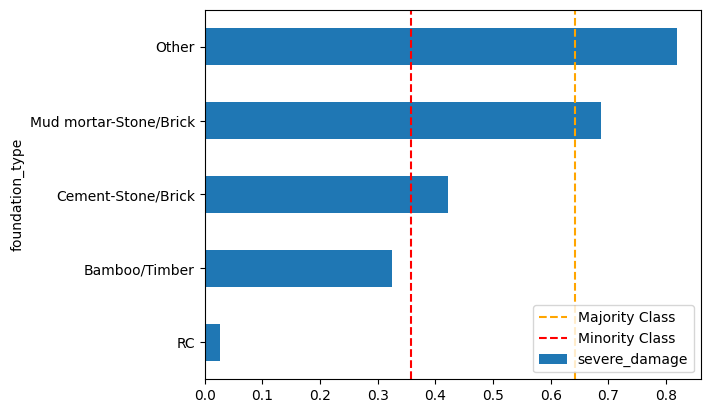

In [ ]:
foundation_pivot.plot(kind = "barh", )
plt.axvline(
    major_class,
    linestyle = "--",
    color = "orange",
    label = "Majority Class"
)
plt.axvline(
    minor_class,
    linestyle = "--",
    color = "red",
    label = "Minority Class"
)
plt.legend(loc ="lower right");

In [ ]:
df.select_dtypes("object").nunique()

,0
land_surface_condition,3
foundation_type,5
roof_type,3
ground_floor_type,5
other_floor_type,4
position,4
plan_configuration,10
superstructure,11


In [ ]:
target = "severe_damage"
X = df.drop("severe_damage", axis = 1)
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    #4 args
    X,
    y,
    test_size = 0.2,
    random_state  = 42
)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (56668, 11)
X_test shape:  (14168, 11)
y_train shape:  (56668,)
y_test shape:  (14168,)


In [ ]:
##Model Building
#Baseline Model
y_train.value_counts(normalize = True).max()

0.6410319757182183

In [ ]:
acc_baseline = y_train.value_counts(normalize = True).max()
#we took the proportion of the major class as the accuracy score

In [ ]:
##Iterate - LOGISTIC REGRESSION
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    LogisticRegression(max_iter=5000)

)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=5000))])

In [ ]:
#Evaluate the model
#1 use acc score func
model.score(X_test,y_test)

0.7221908526256352

In [ ]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.71
Test Accuracy: 0.72


In [ ]:
##Communication
print(model.predict(X_train)[:5])
print(model.predict_proba(X_train)[:5])#finding out the probabilty
#the one on the left represent negative class and the one on the right represents the positive class

[0 1 1 1 1]
[[0.96803372 0.03196628]
 [0.48928899 0.51071101]
 [0.34601009 0.65398991]
 [0.40166053 0.59833947]
 [0.33224545 0.66775455]]


In [ ]:
features = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps["logisticregression"].coef_[0]

/tmp/ipython-input-1294114254.py:1: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  features = model.named_steps["onehotencoder"].get_feature_names()


In [ ]:
#feature importances

feat_imp = pd.Series(np.exp(importances), index = features).sort_values()
feat_imp.head()

,0
superstructure_Other,0.244538
"superstructure_Brick, cement mortar",0.348018
foundation_type_RC,0.378589
roof_type_RCC/RB/RBC,0.408178
plan_configuration_Multi-projected,0.449609


Text(0.5, 0, 'ODDS RATIO - Highest contributors for severe damage')

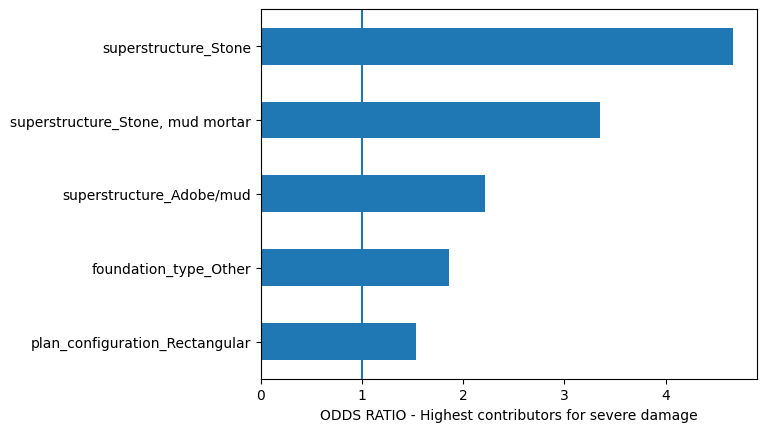

In [ ]:
feat_imp.tail().plot(kind = 'barh')
plt.axvline(1)
plt.xlabel("ODDS RATIO - Highest contributors for severe damage")

Text(0.5, 0, 'ODDS RATIO - Lowest contributors for severe damage')

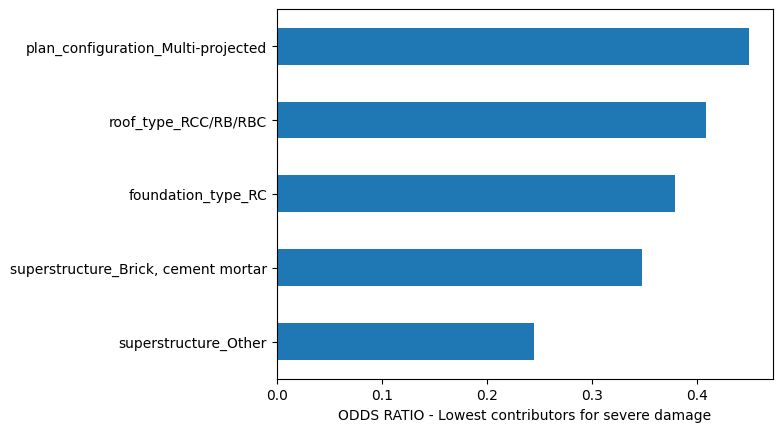

In [ ]:
feat_imp.head().plot(kind = 'barh')
plt.xlabel("ODDS RATIO - Lowest contributors for severe damage")